### SciPy

### Processamento de Imagens

In [4]:
import scipy
scipy.__version__

'1.9.1'

In [5]:
import matplotlib
matplotlib.__version__

'3.5.2'

In [7]:
# Função imread foi descontinuada no Scipy
# from scipy import misc
# misc.imread('Matplotlib-Mapa.png')   

# Usamos agora a função do pacote imageio
from imageio import imread
imread('ml_map.png')  

# Matplotlib tem uma função similar
import matplotlib.pyplot as plt
plt.imread('ml_map.png') 

C:\Users\KAL-EL\AppData\Local\Temp\ipykernel_27368\888529617.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imread('ml_map.png')


array([[[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059]],

       [[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059]],

       [[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059]],

       ...,

       [[0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        [0.9607843, 0.9647059, 0.9647059],
        ...,
        [0.9607843, 0.9647

### Integração Numérica

In [8]:
import numpy as np
np.__version__

'1.21.5'

In [9]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [10]:
# Integração
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [11]:
from scipy.integrate import odeint, ode

In [12]:
from pylab import *
%matplotlib inline

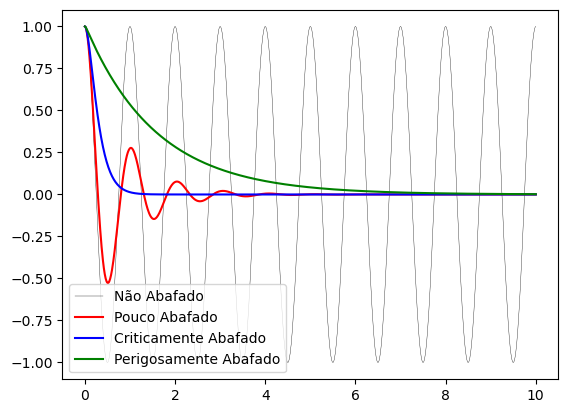

In [13]:
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]


y0 = [1.0, 0.0]

t = linspace(0, 10, 1000)
w0 = 2*pi*1.0


y1 = odeint(dy, y0, t, args=(0.0, w0)) 
y2 = odeint(dy, y0, t, args=(0.2, w0)) 
y3 = odeint(dy, y0, t, args=(1.0, w0)) 
y4 = odeint(dy, y0, t, args=(5.0, w0)) 

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="Não Abafado", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="Pouco Abafado")
ax.plot(t, y3[:,0], 'b', label="Criticamente Abafado")
ax.plot(t, y4[:,0], 'g', label="Perigosamente Abafado")
ax.legend();

### Fourier Transformation

In [14]:
from scipy.fftpack import *

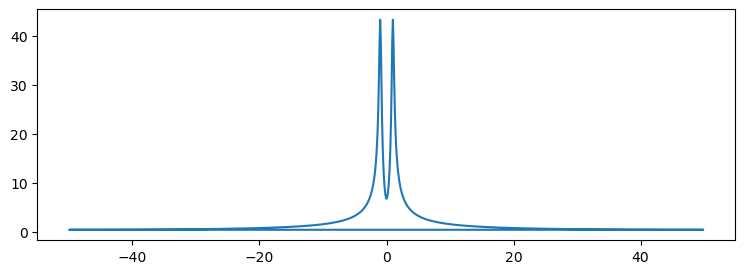

In [15]:
# Fourier transformation
N = len(t)
dt = t[1]-t[0]

F = fft(y2[:,0]) 

w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

### Álgebra Linear

In [16]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])

In [17]:
# Resolvendo um sistema de equações lineares
x = solve(A, b)
x

array([ 2., -2.,  9.])

In [18]:
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.9290671 , -0.09630691, -0.73231937])

In [19]:
evecs

array([[-0.55896766, -0.724995  ,  0.15139384],
       [-0.57378447, -0.11535207, -0.85317475],
       [-0.59860382,  0.67902589,  0.49917207]])

In [20]:
svd(A)

(array([[-0.54549556,  0.27569899, -0.79146994],
        [-0.62146547, -0.7666639 ,  0.16126727],
        [-0.5623302 ,  0.57984182,  0.58954915]]),
 array([1.95345157, 0.75633996, 0.0920843 ]),
 array([[-0.57467123, -0.43441359, -0.69356889],
        [-0.34859714,  0.8966934 , -0.27280211],
        [ 0.74042758,  0.0850046 , -0.66673924]]))

### Otimização

In [21]:
from scipy import optimize

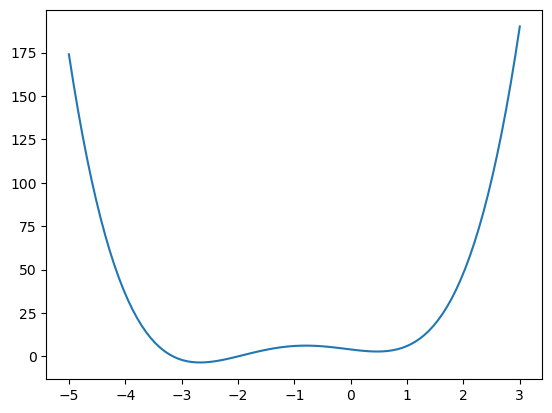

In [22]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [23]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([0.46961743])

### Estatística

In [24]:
from scipy import stats

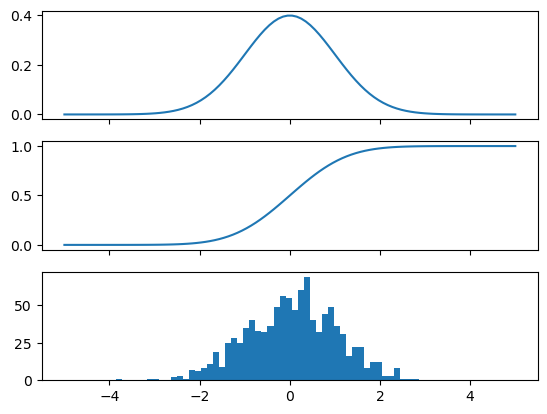

In [25]:
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

axes[0].plot(x, Y.pdf(x))

axes[1].plot(x, Y.cdf(x));

axes[2].hist(Y.rvs(size=1000), bins=50);

In [26]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [27]:
# T-test
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(-0.6378839775966687, 0.5236223043094641)